In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [61]:
df = pd.read_csv("../data/processed_data/cleaned_reviews.csv")
df.head()

,Review,Rating,Review_clean,Review_tokens,Review_filtered,Review_lemmatized,Cleaned_Review,Review_word_count
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'get...",nice hotel expensive parking get good deal sta...,80
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,230
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattl...,"['nice', 'rooms', 'not', 'experience', 'hotel'...","['nice', 'rooms', 'experience', 'hotel', 'mona...","['nice', 'room', 'experience', 'hotel', 'monac...",nice room experience hotel monaco seattle good...,199
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...",unique great stay wonderful time hotel monaco ...,85
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'go', 'seah...",great stay great stay go seahawk game awesome ...,178


In [62]:
df.shape

(20491, 8)

In [63]:
df = df[["Cleaned_Review", "Rating", "Review_word_count"]]
df.head()

,Cleaned_Review,Rating,Review_word_count
0,nice hotel expensive parking get good deal sta...,4,80
1,ok nothing special charge diamond member hilto...,2,230
2,nice room experience hotel monaco seattle good...,3,199
3,unique great stay wonderful time hotel monaco ...,5,85
4,great stay great stay go seahawk game awesome ...,5,178


In [64]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
)

tfidf_matrix = vectorizer.fit_transform(df["Cleaned_Review"])
tfidf_matrix.shape

(20491, 5000)

In [65]:
pca = PCA(n_components=50, random_state=42)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
tfidf_pca.shape

(20491, 50)

In [66]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_pca)
tfidf_tsne.shape

(20491, 2)

In [56]:
umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='cosine',
    random_state=42
)

umap_2d = umap_model.fit_transform(tfidf_pca)
umap_2d.shape

/Users/taanone1/miniconda3/envs/reviews_hotel/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(20491, 2)

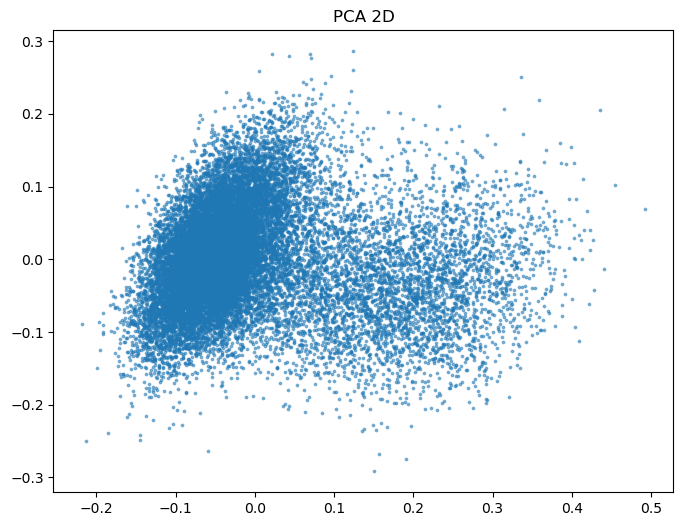

In [57]:
pca_2d = PCA(n_components=2, random_state=42).fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], s=3, alpha=0.5)
plt.title("PCA 2D")
plt.show()


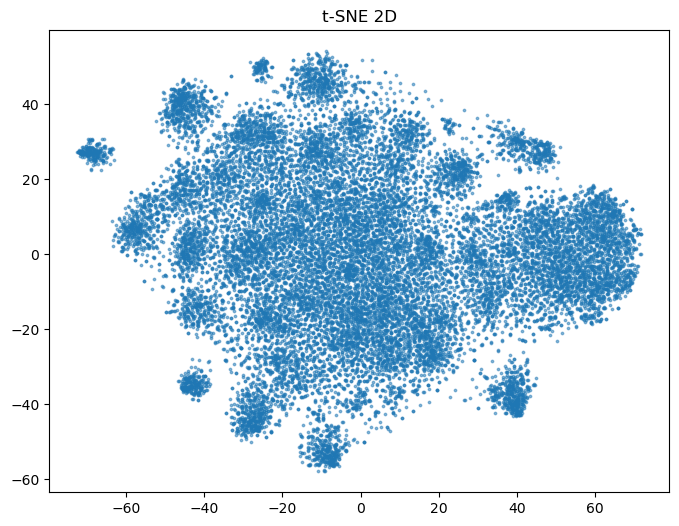

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(tfidf_tsne[:,0], tfidf_tsne[:,1], s=3, alpha=0.5)
plt.title("t-SNE 2D")
plt.show()


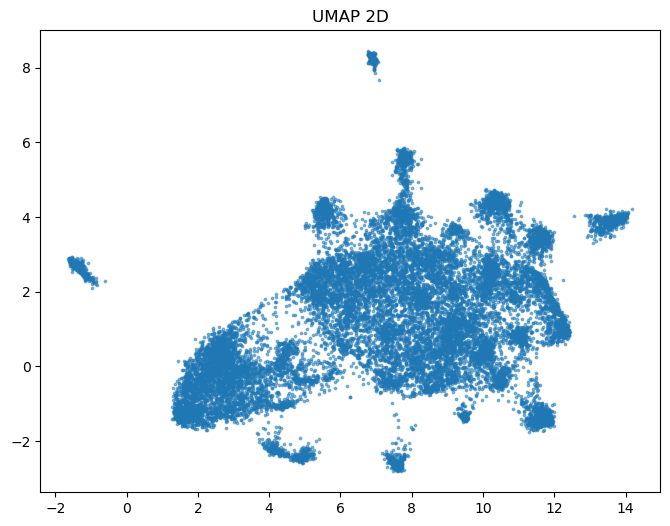

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(umap_2d[:,0], umap_2d[:,1], s=3, alpha=0.5)
plt.title("UMAP 2D")
plt.show()


In [67]:
import numpy as np

np.save("../data/processed_data/pca_2d.npy", pca_2d)
np.save("../data/processed_data/tsne_2d.npy", tfidf_tsne)
np.save("../data/processed_data/umap_2d.npy", umap_2d)
